**Income Prediction:**

An individual’s annual income results from various factors. The objective is to predict, if the salary is greater than $50K or not.

The dataset contains 15 columns

Target filed: Income

-- The income is divide into two classes: <=50K and >50K

Number of attributes: 14

-- These are the demographics and other features to describe a person

About the Dataset:

1. age: age of a data article
2. workclass: the place where they work
3. fnlwgt: means final weight
4. education: education of a particular person
5. education Num: education number means number of years they educated
6. marital status: Represent the marital status of the individual
7. occupation: Occupation of the individual
8. relationship: Relationship of the individual
9. race: Race of the individual
10. gender: Gender of the individual
11. capital-gain: Captial-gain of individual
12. capital-loss: Capital-loss of individual
13. hours-per-week: How many Hours per week they work
14. native-country: Native country of the individual








           1: Income above >=50k
           0: Income below <50k



## Importing the Dependencies:

We are going to use the Google Collab GPU

In [ ]:
import tensorflow as tf

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
#Basic Libraries for Machine Learning
import numpy as np
import pandas as pd

# For Date Visualization and EDA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

# Importing sklearn library
import sklearn

# For Data Encoding
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# For Correlation matrix
from scipy.stats import pearsonr

# For Scaling the datasets
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest

# Splitting the datasets
from sklearn.model_selection import train_test_split

# For checking accuracy and confusion matrix
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

#Cross-validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import uniform, randint

# For importing the models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, make_scorer

# Data Collection and Pre-Processing:

In [ ]:
# loading the dataset to pandas DataFrame
train = pd.read_csv('/content/train.csv')

In [ ]:
# printing the first 5 rows of the dataframe
train.head()

,Unnamed: 0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States
1,1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States
2,2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
3,3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States
4,4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States


In [ ]:
# printing the last 5 rows of the dataframe
train.tail()

,Unnamed: 0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
43952,43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
43953,43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States
43954,43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States
43955,43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States
43956,43956,30,Private,375827,HS-grad,9,Never-married,Handlers-cleaners,Other-relative,White,Male,0,0,40,United-States


In [ ]:
# number of rows and columns
train.shape

(43957, 15)

In [ ]:
# loading the train class label dataset to pandas DataFrame
train_class_labels = pd.read_csv('/content/train_class_labels.csv')

In [ ]:
# printing the first 5 rows of the dataframe
train_class_labels.head()

,Unnamed: 0,income_>50K
0,0,1
1,1,0
2,2,1
3,3,0
4,4,0


In [ ]:
# number of rows and columns
train_class_labels.shape

(43957, 2)

Now we are going to merge the two datasets

In [ ]:
income_dataset = pd.merge(train,train_class_labels)

In [ ]:
# printing the first 5 rows of the dataframe
income_dataset.head()

,Unnamed: 0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [ ]:
# printing the last 5 rows of the dataframe
income_dataset.tail()

,Unnamed: 0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
43952,43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0
43956,43956,30,Private,375827,HS-grad,9,Never-married,Handlers-cleaners,Other-relative,White,Male,0,0,40,United-States,0


In [ ]:
# number of rows and columns
income_dataset.shape

(43957, 16)

Now we are going to remove the first column, as that is just a Serial number.

In [ ]:
# drop the "Unnamed: 0" column from the dataFrame
income_dataset = income_dataset.drop(columns='Unnamed: 0', axis=1)

In [ ]:
income_dataset.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [ ]:
# number of rows and columns
income_dataset.shape

(43957, 15)

In [ ]:
income_dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_>50K'],
      dtype='object')

In [ ]:
income_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.4+ MB


From the above, we can see that there are 7 numerical column and 8 categorical column

In [ ]:
# statistical measures
income_dataset.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [ ]:
income_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,43957.0,38.617149,13.734401,17.0,28.0,37.0,48.0,90.0
fnlwgt,43957.0,189673.004368,105821.522560,13492.0,117496.0,178100.0,237671.0,1490400.0
educational-num,43957.0,10.074118,2.575092,1.0,9.0,10.0,12.0,16.0
capital-gain,43957.0,1093.559797,7570.536063,0.0,0.0,0.0,0.0,99999.0
capital-loss,43957.0,88.246491,404.588410,0.0,0.0,0.0,0.0,4356.0
hours-per-week,43957.0,40.407694,12.400303,1.0,40.0,40.0,45.0,99.0
income_>50K,43957.0,0.239279,0.426648,0.0,0.0,0.0,0.0,1.0


In [ ]:
# number of missing values in each column
income_dataset.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

# Handling the Missing values:

The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values. There are many ways of handling the missing/null values.

**1. Deleting Rows with missing values:**

Missing values can be handled by deleting the rows or columns having null values. If columns have more than half of the rows as null then the entire column can be dropped. The rows which are having one or more columns values as null can also be dropped.

***Pros:***

A model trained with the removal of all missing values creates a robust model.

***Cons:***

Loss of a lot of information.

Works poorly if the percentage of missing values is excessive in comparison to the complete dataset.


**2.1.Impute missing values with Mean/Median for Numeric columns:**

Columns in the dataset which are having numeric continuous values can be replaced with the mean, median, of values in the column. This method can prevent the loss of data compared to the earlier method. Replacing the above two approximations (mean, median) is a statistical approach to handle the missing values.

***Pros:***

Prevent data loss which results in deletion of rows or columns.

***Cons:***

Works only with numerical continuous variables.
Can cause data leakage.

**2.2.Imputation method for categorical columns:**

When missing values is from categorical columns (string or numerical) then the missing values can be replaced with the most frequent category/values(called as mode). If the number of missing values is very large then it can be replaced with a new category.

***Pros:***

Prevent data loss which results in deletion of rows or columns.
Works well with a small dataset and is easy to implement.

***Cons:***

Works only with categorical variables.
Addition of new features to the model while encoding, which may result in poor performance.

## Method - 2:

In [ ]:
# finding the mode value of "workclass" column
# finding the highest occurance of a value
print(income_dataset['workclass'].mode())

0    Private
Name: workclass, dtype: object


In [ ]:
print(income_dataset['workclass'].mode()[0])

Private


In [ ]:
income_dataset['workclass'].fillna(income_dataset['workclass'].mode()[0], inplace=True)

In [ ]:
# finding the mode value of "occupation" column
# finding the highest occurance of a value
print(income_dataset['occupation'].mode())

0    Craft-repair
Name: occupation, dtype: object


In [ ]:
print(income_dataset['occupation'].mode()[0])

Craft-repair


In [ ]:
income_dataset['occupation'].fillna(income_dataset['occupation'].mode()[0], inplace=True)

In [ ]:
# finding the mode value of "native-country" column
# finding the highest occurance of a value
print(income_dataset['native-country'].mode())

0    United-States
Name: native-country, dtype: object


In [ ]:
print(income_dataset['native-country'].mode()[0])

United-States


In [ ]:
income_dataset['native-country'].fillna(income_dataset['native-country'].mode()[0], inplace=True)

In [ ]:
income_dataset2 = income_dataset

In [ ]:
# number of missing values in each column
income_dataset2.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income_>50K        0
dtype: int64

In [ ]:
income_dataset2.shape

(43957, 15)

In [ ]:
income_dataset2.head(50) # Here we can able to see that in 33rd row the workplace column changed from null value to as private
                         # and the occupation column changed from null value to craft-repair

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
5,59,State-gov,105363,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,0
6,70,Private,216390,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,2653,0,40,United-States,0
7,35,Self-emp-not-inc,361888,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,Japan,0
8,28,Private,74784,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,50,United-States,0
9,28,Private,118089,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,4386,0,45,United-States,1


# Data Analysis and Data Visualization:

## For the Categorical Columns:

Categorical Features:
- workclass
- education
- marital-status
- occupation
- relationship
- race
- gender
- native-country

In [ ]:
category_feacture=['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'gender','native-country']
l=[]
for i in category_feacture:
    print('-------------------')
    print(i)
    print('-------------------')
    print((income_dataset2[i].value_counts()))
    print('------------------------------------------------------------------')


-------------------
workclass
-------------------
Private             33085
Self-emp-not-inc     3464
Local-gov            2822
State-gov            1756
Self-emp-inc         1518
Federal-gov          1284
Without-pay            20
Never-worked            8
Name: workclass, dtype: int64
------------------------------------------------------------------
-------------------
education
-------------------
HS-grad         14197
Some-college     9790
Bachelors        7219
Masters          2392
Assoc-voc        1831
11th             1647
Assoc-acdm       1447
10th             1250
7th-8th           862
Prof-school       748
9th               684
12th              587
Doctorate         536
5th-6th           468
1st-4th           223
Preschool          76
Name: education, dtype: int64
------------------------------------------------------------------
-------------------
marital-status
-------------------
Married-civ-spouse       20147
Never-married            14513
Divorced                  597

<function matplotlib.pyplot.show(close=None, block=None)>

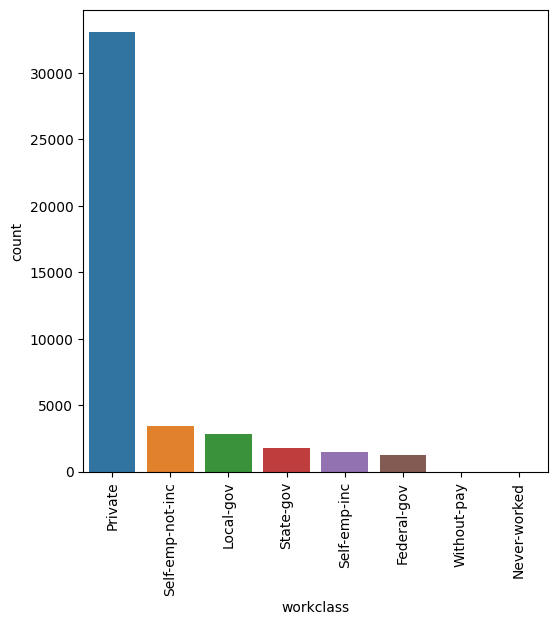

In [ ]:
#making a countplot for "Workclass" column
plt.figure(figsize=(6,6))
sns.countplot(x='workclass', data=income_dataset2, order = income_dataset2['workclass'].value_counts().index)
plt.xticks(rotation=90);
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

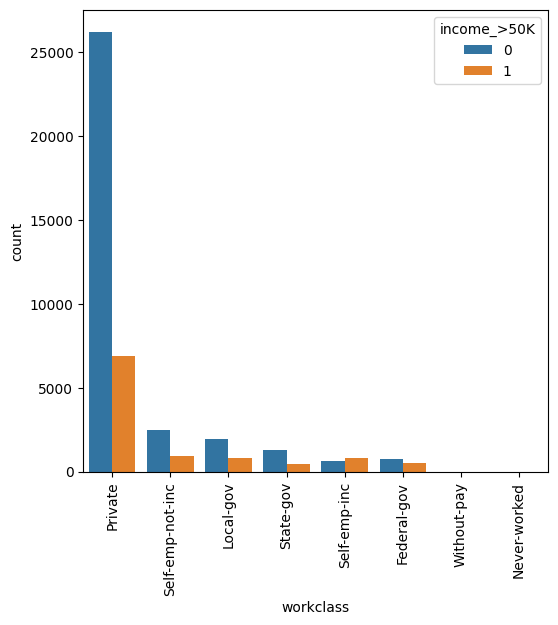

In [ ]:
#making a countplot for "Workclass" with respect to "income_>50k" column
plt.figure(figsize=(6,6))
sns.countplot(x='workclass', data=income_dataset2, order = income_dataset2['workclass'].value_counts().index,
              hue=income_dataset2['income_>50K'])
plt.xticks(rotation=90);
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

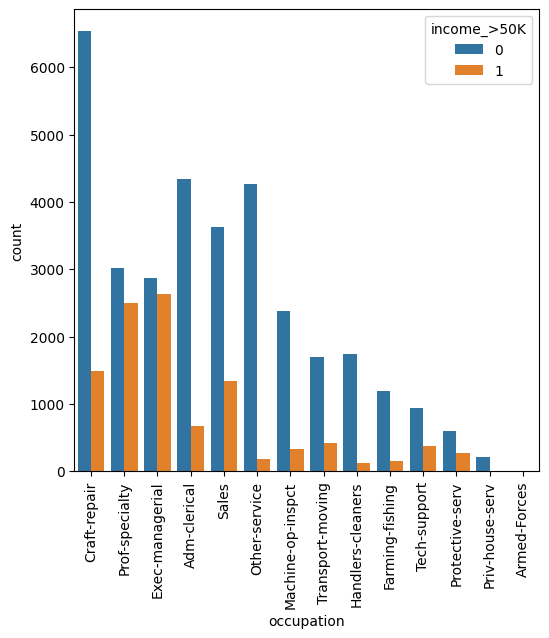

In [ ]:
#making a countplot for "Occupation" with respect to "income_>50k" column
plt.figure(figsize=(6,6))
sns.countplot(x='occupation', data=income_dataset2, order = income_dataset2['occupation'].value_counts().index,
              hue=income_dataset2['income_>50K'])
plt.xticks(rotation=90);
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

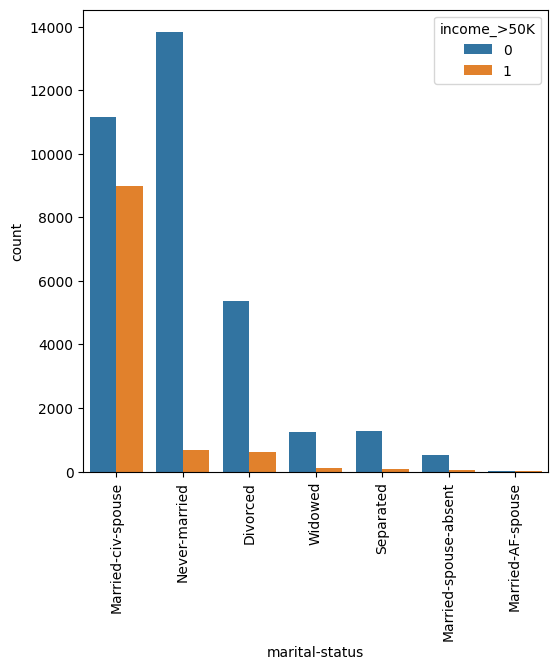

In [ ]:
#making a countplot for "marital-status" with respect to "income_>50k" column
plt.figure(figsize=(6,6))
sns.countplot(x='marital-status', data=income_dataset2, order = income_dataset2['marital-status'].value_counts().index,
              hue=income_dataset2['income_>50K'])
plt.xticks(rotation=90);
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

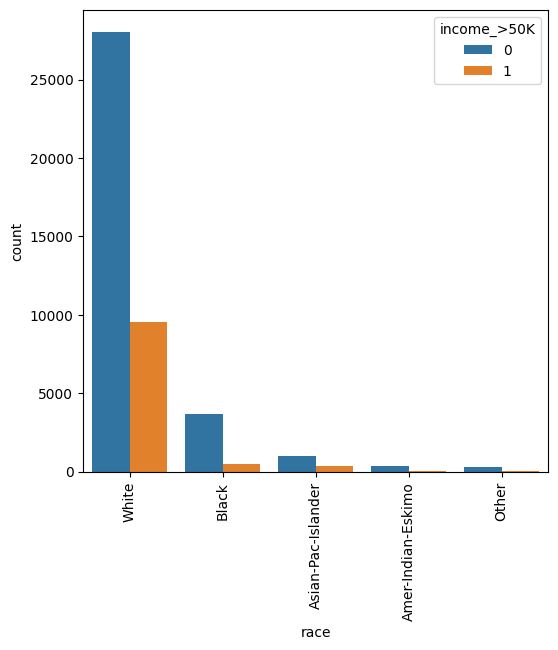

In [ ]:
#making a countplot for "race" with respect to "income_>50k" column
plt.figure(figsize=(6,6))
sns.countplot(x='race', data=income_dataset2, order = income_dataset2['race'].value_counts().index,
              hue=income_dataset2['income_>50K'])
plt.xticks(rotation=90);
plt.show

## For the Numerical Columns:

Numerical Features:
- Age
- fnlwgt
- educational-num
- capital gain
- capital loss
- hours per week
- income_>50k

<function matplotlib.pyplot.show(close=None, block=None)>

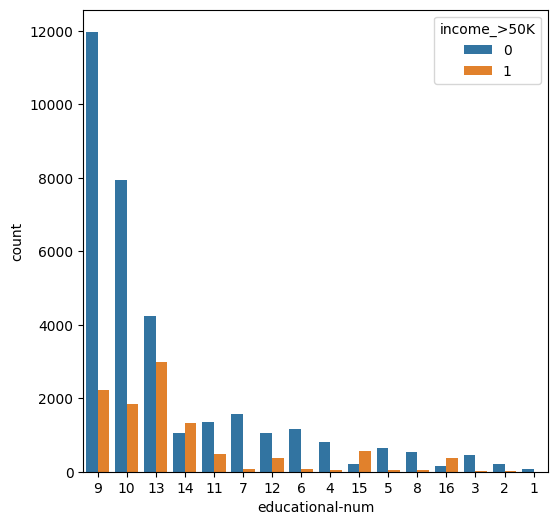

In [ ]:
#making a countplot for "educational-num" column with respect to "Income=>50k" column
plt.figure(figsize=(6,6))
sns.countplot(x='educational-num', data=income_dataset2, order = income_dataset2['educational-num'].value_counts().index,
              hue=income_dataset2['income_>50K'])
plt.show

Now for Income_>50K column:

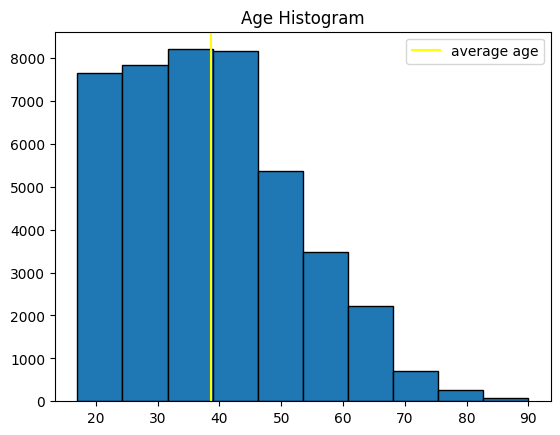

In [ ]:
plt.hist(income_dataset2['age'], edgecolor='black')
plt.title('Age Histogram')
plt.axvline(np.mean(income_dataset2['age']), color='yellow', label='average age')
plt.legend()

<function matplotlib.pyplot.show(close=None, block=None)>

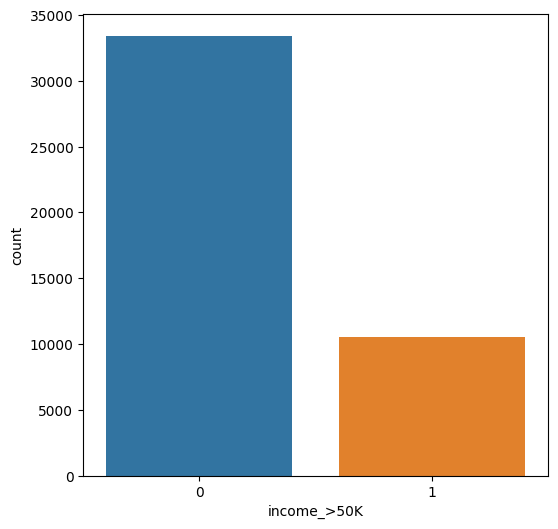

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='income_>50K', data=income_dataset2)
plt.show

In [ ]:
income_dataset2['income_>50K'].value_counts()

0    33439
1    10518
Name: income_>50K, dtype: int64

In [ ]:
print(f"<= 50k for Income_dataset2 : {round(33439 / 43957 * 100 , 2)}")
print(f"> 50k for Income_dataset2: {round(10518 / 43957 * 100 , 2)}")

<= 50k for Income_dataset2 : 76.07
> 50k for Income_dataset2: 23.93


# Data/Label Encoding:

We have 8 Categorical Columns in the dataset.

Computers can understand only numerical data's, they can't understand text data's. So, we have to convert the categorical columns into numerical columns so that computer can understand. This is termed as Data/Label Encoding in Machine Learning.

In [ ]:
encoder = LabelEncoder()

In [ ]:
income_dataset2['workclass'] = encoder.fit_transform(income_dataset2['workclass'])

income_dataset2['education'] = encoder.fit_transform(income_dataset2['education'])

income_dataset2['marital-status'] = encoder.fit_transform(income_dataset2['marital-status'])

income_dataset2['occupation'] = encoder.fit_transform(income_dataset2['occupation'])

income_dataset2['relationship'] = encoder.fit_transform(income_dataset2['relationship'])

income_dataset2['race'] = encoder.fit_transform(income_dataset2['race'])

income_dataset2['gender'] = encoder.fit_transform(income_dataset2['gender'])

income_dataset2['native-country'] = encoder.fit_transform(income_dataset2['native-country'])

In [ ]:
income_dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              43957 non-null  int64
 1   workclass        43957 non-null  int64
 2   fnlwgt           43957 non-null  int64
 3   education        43957 non-null  int64
 4   educational-num  43957 non-null  int64
 5   marital-status   43957 non-null  int64
 6   occupation       43957 non-null  int64
 7   relationship     43957 non-null  int64
 8   race             43957 non-null  int64
 9   gender           43957 non-null  int64
 10  capital-gain     43957 non-null  int64
 11  capital-loss     43957 non-null  int64
 12  hours-per-week   43957 non-null  int64
 13  native-country   43957 non-null  int64
 14  income_>50K      43957 non-null  int64
dtypes: int64(15)
memory usage: 5.4 MB


Here for Example

In Race column:

- White - 4              
- Black - 2             
- Asian-Pac-Islander - 1  
- Amer-Indian-Eskimo - 0  
- Other - 3

In Gender column:

- Male - 1
- Female - 0

Same for all other columns

The labels are given in the ascending order.

There is no text data in any column in Income_dataset2

# Correlation of Columns:

The most commonly used is the **Pearson Correlation** method.

In [ ]:
correlation2 = income_dataset2.corr(method='pearson')

<Axes: >

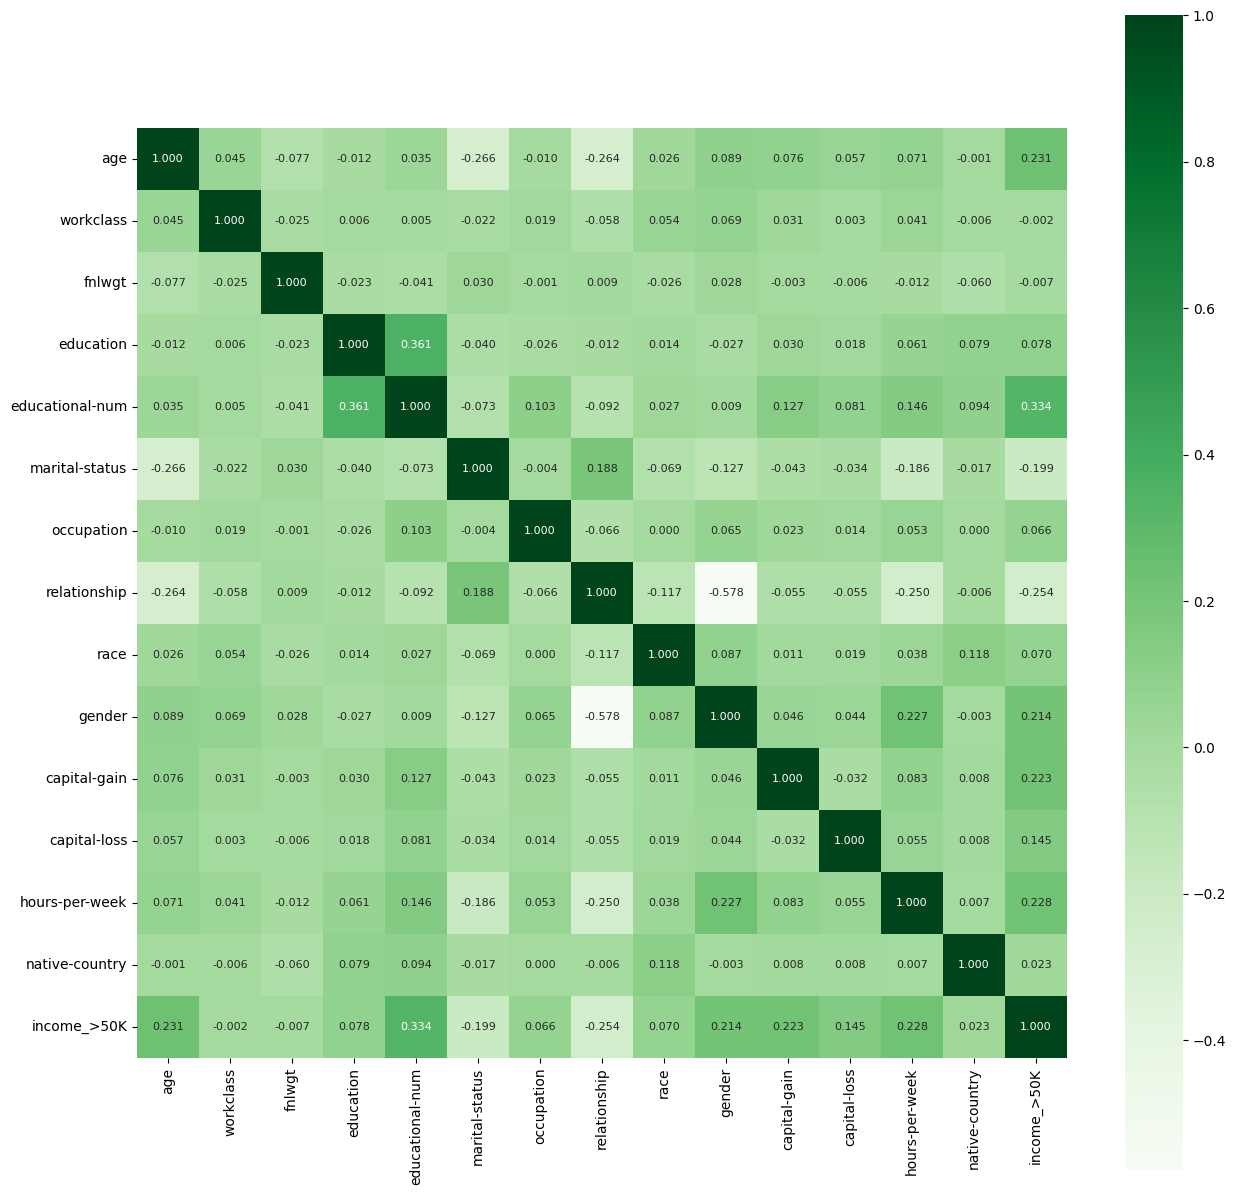

In [ ]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(15, 15))
sns.heatmap(correlation2, cbar=True, square=True, annot=True, fmt='.3f', annot_kws={'size':8}, cmap='Greens')

# Splitting features and target:

In [ ]:
X_2 = income_dataset2.iloc[:,:-1]
Y_2 = income_dataset2['income_>50K']

In [ ]:
print(X_2)

       age  workclass  fnlwgt  education  educational-num  marital-status  \
0       67          3  366425         10               16               0   
1       17          3  244602          2                8               4   
2       31          3  174201          9               13               2   
3       58          6  110199          5                4               2   
4       25          6  149248         15               10               4   
...    ...        ...     ...        ...              ...             ...   
43952   52          3   68982          9               13               2   
43953   19          3  116562         11                9               4   
43954   30          3  197947         15               10               0   
43955   46          3   97883          9               13               4   
43956   30          3  375827         11                9               4   

       occupation  relationship  race  gender  capital-gain  capital-loss  

In [ ]:
print(Y_2)

0        1
1        0
2        1
3        0
4        0
        ..
43952    1
43953    0
43954    0
43955    0
43956    0
Name: income_>50K, Length: 43957, dtype: int64


In [ ]:
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_2, Y_2, test_size = 0.2, random_state = 30, stratify = Y_2)

In [ ]:
print(X_train_2.shape, X_test_2.shape, Y_train_2.shape, Y_test_2.shape)

(35165, 14) (8792, 14) (35165,) (8792,)


# Feature Scaling:

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.(done to reduce bias in algorithm)

Here we have used StandardScaler method

**Standardization:** It is a very effective technique which re-scales a feature value so that it has distribution with 0 mean value and variance equals to 1.

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_2 = pd.DataFrame(scaler.fit_transform(X_train_2), columns=X_train_2.columns)
X_test_2 = pd.DataFrame(scaler.fit_transform(X_test_2), columns=X_test_2.columns)

In [ ]:
X_train_2.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,-0.555982,-0.088929,-0.312523,0.181391,-0.421227,-0.409001,1.307206,-0.901748,0.391913,0.704228,0.235889,-0.218738,-0.027568,0.259500
1,2.501120,-1.889277,-0.709836,-1.625289,-2.757207,2.243257,0.311227,0.344346,-3.159442,-1.419994,-0.144507,-0.218738,-1.238349,-1.236507
2,1.336510,-0.088929,-1.206923,1.213780,-0.031897,-0.409001,-0.933746,-0.901748,0.391913,0.704228,-0.144507,3.894833,0.376026,0.259500
3,-1.429440,-0.088929,0.392860,1.213780,-0.031897,0.917128,0.062233,0.967393,0.391913,0.704228,-0.144507,-0.218738,-1.641942,0.259500
4,-0.919923,-0.088929,0.434096,1.213780,-0.031897,0.917128,1.307206,0.344346,0.391913,-1.419994,-0.144507,-0.218738,-1.641942,0.259500


In [ ]:
X_train_2.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
35160,1.846027,0.811245,1.109287,-1.883386,-3.146537,-0.409001,1.307206,-0.901748,0.391913,0.704228,-0.144507,-0.218738,-1.641942,0.2595
35161,1.409298,2.611593,0.097508,0.181391,-0.421227,-0.409001,-0.933746,-0.901748,0.391913,0.704228,-0.144507,-0.218738,-0.027568,0.2595
35162,1.846027,-0.088929,-0.284732,0.181391,-0.421227,-0.409001,1.805196,-0.901748,0.391913,0.704228,1.276229,-0.218738,-0.027568,0.2595
35163,-1.138287,-0.088929,0.110198,0.181391,-0.421227,-0.409001,-1.431736,0.344346,0.391913,0.704228,-0.144507,-0.218738,-0.027568,0.2595
35164,1.773238,-0.088929,-0.413993,0.181391,-0.421227,-0.409001,-0.933746,-0.901748,0.391913,0.704228,-0.144507,-0.218738,-0.027568,0.2595


In [ ]:
X_test_2.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,0.106999,-1.911929,0.537336,0.453585,1.521471,-0.414213,0.805892,-0.897149,0.396345,0.701384,-0.144646,4.575523,0.588929,0.266704
1,-1.132350,-0.084790,-1.399412,1.223454,-0.016487,0.917084,0.805892,-0.266786,0.396345,0.701384,-0.144646,-0.215628,0.347818,0.266704
2,2.585698,-0.084790,0.143885,0.196962,-0.400976,-0.414213,-0.194800,-0.897149,0.396345,0.701384,0.183622,-0.215628,-2.304407,0.266704
3,0.763125,-0.084790,1.049430,0.196962,-0.400976,-0.414213,0.055373,-0.897149,0.396345,0.701384,0.358212,-0.215628,0.749670,0.266704
4,1.565057,-0.084790,-0.343584,1.223454,-0.016487,-0.414213,-0.695147,-0.897149,0.396345,0.701384,-0.144646,4.575523,-0.054034,0.266704


In [ ]:
print(X_train_2.shape, X_test_2.shape, Y_train_2.shape, Y_test_2.shape)

(35165, 14) (8792, 14) (35165,) (8792,)


# Training the data's with different models(Without Hyperparameter tunning):



**K-Nearest Neighbors**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_2, Y_train_2)
prediction_knn_2 = knn.predict(X_test_2)
print('\n********** K-Nearest Neighbors **********\n')
acc_knn_2 = accuracy_score(Y_test_2, prediction_knn_2)
con_knn_2 = confusion_matrix(Y_test_2, prediction_knn_2)
class_knn_2 = classification_report(Y_test_2, prediction_knn_2)
print("Accuracy Score: \n", acc_knn_2)
print("Confusion Matrix: \n", con_knn_2)
print("Classification Report: \n", class_knn_2)


********** K-Nearest Neighbors **********

Accuracy Score: 
 0.8322338489535942
Confusion Matrix: 
 [[6094  594]
 [ 881 1223]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      6688
           1       0.67      0.58      0.62      2104

    accuracy                           0.83      8792
   macro avg       0.77      0.75      0.76      8792
weighted avg       0.83      0.83      0.83      8792



# Feature Selection:

In [ ]:
# drop the unnecessary column from the Income dataset
income_dataset2 = income_dataset2.drop(columns=['fnlwgt', 'workclass', 'education', 'race'], axis=1)

In [ ]:
income_dataset2.head()

,age,educational-num,marital-status,occupation,relationship,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,16,0,3,1,1,99999,0,60,38,1
1,17,8,4,7,3,1,0,0,15,38,0
2,31,13,2,3,0,1,0,0,40,38,1
3,58,4,2,13,0,1,0,0,40,38,0
4,25,10,4,7,1,1,0,0,40,38,0


In [ ]:
X_2 = income_dataset2.iloc[:,:-1]
Y_2 = income_dataset2['income_>50K']

In [ ]:
print(X_2)

       age  educational-num  marital-status  occupation  relationship  gender  \
0       67               16               0           3             1       1   
1       17                8               4           7             3       1   
2       31               13               2           3             0       1   
3       58                4               2          13             0       1   
4       25               10               4           7             1       1   
...    ...              ...             ...         ...           ...     ...   
43952   52               13               2           3             0       1   
43953   19                9               4           7             3       0   
43954   30               10               0          11             1       1   
43955   46               13               4          11             1       0   
43956   30                9               4           5             2       1   

       capital-gain  capita

In [ ]:
print(Y_2)

0        1
1        0
2        1
3        0
4        0
        ..
43952    1
43953    0
43954    0
43955    0
43956    0
Name: income_>50K, Length: 43957, dtype: int64


In [ ]:
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_2, Y_2, test_size = 0.2, random_state = 30, stratify = Y_2)

In [ ]:
print(X_train_2.shape, X_test_2.shape, Y_train_2.shape, Y_test_2.shape)

(35165, 10) (8792, 10) (35165,) (8792,)


In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_2 = pd.DataFrame(scaler.fit_transform(X_train_2), columns=X_train_2.columns)
X_test_2 = pd.DataFrame(scaler.fit_transform(X_test_2), columns=X_test_2.columns)

In [ ]:
X_train_2.head()

,age,educational-num,marital-status,occupation,relationship,gender,capital-gain,capital-loss,hours-per-week,native-country
0,-0.555982,-0.421227,-0.409001,1.307206,-0.901748,0.704228,0.235889,-0.218738,-0.027568,0.259500
1,2.501120,-2.757207,2.243257,0.311227,0.344346,-1.419994,-0.144507,-0.218738,-1.238349,-1.236507
2,1.336510,-0.031897,-0.409001,-0.933746,-0.901748,0.704228,-0.144507,3.894833,0.376026,0.259500
3,-1.429440,-0.031897,0.917128,0.062233,0.967393,0.704228,-0.144507,-0.218738,-1.641942,0.259500
4,-0.919923,-0.031897,0.917128,1.307206,0.344346,-1.419994,-0.144507,-0.218738,-1.641942,0.259500


In [ ]:
print(X_train_2.shape, X_test_2.shape, Y_train_2.shape, Y_test_2.shape)

(35165, 10) (8792, 10) (35165,) (8792,)


# Training the data's with different models(With Hyperparameter tunning):

**K-Nearest Neighbor**

In [ ]:
print("\n********** K-Nearest Neighbors ***********\n")
print("\n********** Using Hyperparameter Tuning ***********\n")
KNN = KNeighborsClassifier()

param_grid = {'n_neighbors' : [3, 5, 7, 9],         # number of nearest neighbour
              'weights' : ['uniform', 'distance'],           # assign weight to neighbour
              'metric' : ['euclidean','manhattan','minkowski']      # specification of distance
}

# Perform the grid search using 10 fold cross validations
grid_search_KNN =  GridSearchCV(KNN, param_grid, scoring='f1', cv=10)
grid_search_KNN.fit(X_train_2, Y_train_2)
prediction_KNN=grid_search_KNN.predict(X_test_2)
print("Accuracy Score:\n", accuracy_score(Y_test_2, prediction_KNN))
print("Confusion Matrix:\n", confusion_matrix(Y_test_2, prediction_KNN))
print("Classification Report:\n", classification_report(Y_test_2, prediction_KNN))
print("\n*********************************")
print("Best Hyperparameters:", grid_search_KNN.best_params_)
print("Best score: ", grid_search_KNN.best_score_)


********** K-Nearest Neighbors ***********


********** Using Hyperparameter Tuning ***********

Accuracy Score:
 0.8440627843494085
Confusion Matrix:
 [[6174  514]
 [ 857 1247]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      6688
           1       0.71      0.59      0.65      2104

    accuracy                           0.84      8792
   macro avg       0.79      0.76      0.77      8792
weighted avg       0.84      0.84      0.84      8792


*********************************
Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Best score:  0.6460872708235741


After doing hyperparameter tunning, we get a accuracy of 85 %, which has increased from without hyperparameter tunning. Next, will try to implement this dataset in QKNN, using IBM Quantum jupyter lab